In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
%matplotlib inline

In [2]:
df = pd.read_csv('paddydataset.csv')
df.head()

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,SW,W,NNW,WSW,72.0,78,88,85,540,35028
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,NW,S,SE,SSE,64.6,85,84,87,600,35412
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,ENE,NE,NNE,W,85.0,96,84,79,600,36300
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,W,WNW,SE,S,88.5,95,81,84,540,35016
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,SSE,W,SW,NW,72.7,91,83,81,600,34044


In [3]:
df.columns = df.columns.str.lower().str.strip(' ').str.replace(' ','_')
df.columns

Index(['hectares', 'agriblock', 'variety', 'soil_types', 'seedrate(in_kg)',
       'lp_mainfield(in_tonnes)', 'nursery', 'nursery_area_(cents)',
       'lp_nurseryarea(in_tonnes)', 'dap_20days', 'weed28d_thiobencarb',
       'urea_40days', 'potassh_50days', 'micronutrients_70days',
       'pest_60day(in_ml)', '30drain(_in_mm)', '30dai(in_mm)',
       '30_50drain(_in_mm)', '30_50dai(in_mm)', '51_70drain(in_mm)',
       '51_70ai(in_mm)', '71_105drain(in_mm)', '71_105dai(in_mm)',
       'min_temp_d1_d30', 'max_temp_d1_d30', 'min_temp_d31_d60',
       'max_temp_d31_d60', 'min_temp_d61_d90', 'max_temp_d61_d90',
       'min_temp_d91_d120', 'max_temp_d91_d120',
       'inst_wind_speed_d1_d30(in_knots)', 'inst_wind_speed_d31_d60(in_knots)',
       'inst_wind_speed_d61_d90(in_knots)',
       'inst_wind_speed_d91_d120(in_knots)', 'wind_direction_d1_d30',
       'wind_direction_d31_d60', 'wind_direction_d61_d90',
       'wind_direction_d91_d120', 'relative_humidity_d1_d30',
       'relative_humid

In [4]:
categorical_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
numerical_cols = df.dtypes[df.dtypes != 'object'].index.tolist()

In [5]:
df[numerical_cols].corr().abs()['paddy_yield(in_kg)'].sort_values(ascending=False)

paddy_yield(in_kg)                    1.000000
urea_40days                           0.994649
weed28d_thiobencarb                   0.994649
lp_nurseryarea(in_tonnes)             0.994649
hectares                              0.994649
potassh_50days                        0.994649
dap_20days                            0.994649
nursery_area_(cents)                  0.994649
micronutrients_70days                 0.994649
seedrate(in_kg)                       0.994649
lp_mainfield(in_tonnes)               0.994649
pest_60day(in_ml)                     0.994649
trash(in_bundles)                     0.957596
inst_wind_speed_d1_d30(in_knots)      0.020194
min_temp_d1_d30                       0.019400
inst_wind_speed_d61_d90(in_knots)     0.018535
max_temp_d61_d90                      0.018243
min_temp_d61_d90                      0.018043
relative_humidity_d1_d30              0.016463
max_temp_d91_d120                     0.014540
max_temp_d31_d60                      0.011483
min_temp_d31_

# EDA

In [6]:
df.describe().round(3)

,hectares,seedrate(in_kg),lp_mainfield(in_tonnes),nursery_area_(cents),lp_nurseryarea(in_tonnes),dap_20days,weed28d_thiobencarb,urea_40days,potassh_50days,micronutrients_70days,...,inst_wind_speed_d1_d30(in_knots),inst_wind_speed_d31_d60(in_knots),inst_wind_speed_d61_d90(in_knots),inst_wind_speed_d91_d120(in_knots),relative_humidity_d1_d30,relative_humidity_d31_d60,relative_humidity_d61_d90,relative_humidity_d91_d120,trash(in_bundles),paddy_yield(in_kg)
count,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,...,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000,2789.000
mean,3.717,92.937,46.468,74.349,3.717,148.698,7.435,100.855,38.587,55.762,...,7.233,8.513,8.173,9.449,76.257,87.594,85.160,83.859,335.511,22517.729
std,1.438,35.944,17.972,28.756,1.438,57.511,2.876,39.007,14.924,21.567,...,2.567,3.204,1.994,2.517,8.001,6.777,3.493,3.135,134.315,9199.661
min,1.000,25.000,12.500,20.000,1.000,40.000,2.000,27.130,10.380,15.000,...,4.000,4.000,4.000,6.000,64.600,78.000,81.000,79.000,80.000,5410.000
25%,3.000,75.000,37.500,60.000,3.000,120.000,6.000,81.390,31.140,45.000,...,4.000,6.000,8.000,6.000,72.000,80.000,83.000,81.000,240.000,16389.000
50%,4.000,100.000,50.000,80.000,4.000,160.000,8.000,108.520,41.520,60.000,...,8.000,10.000,8.000,10.000,72.700,91.000,84.000,84.000,360.000,24636.000
75%,5.000,125.000,62.500,100.000,5.000,200.000,10.000,135.650,51.900,75.000,...,10.000,12.000,10.000,12.000,85.000,95.000,88.000,87.000,450.000,31035.000
max,6.000,150.000,75.000,120.000,6.000,240.000,12.000,162.780,62.280,90.000,...,10.000,12.000,10.000,12.000,88.500,96.000,92.000,88.000,600.000,38814.000


In [7]:
df.isnull().sum()

hectares                              0
agriblock                             0
variety                               0
soil_types                            0
seedrate(in_kg)                       0
lp_mainfield(in_tonnes)               0
nursery                               0
nursery_area_(cents)                  0
lp_nurseryarea(in_tonnes)             0
dap_20days                            0
weed28d_thiobencarb                   0
urea_40days                           0
potassh_50days                        0
micronutrients_70days                 0
pest_60day(in_ml)                     0
30drain(_in_mm)                       0
30dai(in_mm)                          0
30_50drain(_in_mm)                    0
30_50dai(in_mm)                       0
51_70drain(in_mm)                     0
51_70ai(in_mm)                        0
71_105drain(in_mm)                    0
71_105dai(in_mm)                      0
min_temp_d1_d30                       0
max_temp_d1_d30                       0


In [8]:
df.nunique()

hectares                                6
agriblock                               6
variety                                 3
soil_types                              2
seedrate(in_kg)                         6
lp_mainfield(in_tonnes)                 6
nursery                                 2
nursery_area_(cents)                    6
lp_nurseryarea(in_tonnes)               6
dap_20days                              6
weed28d_thiobencarb                     6
urea_40days                             6
potassh_50days                          6
micronutrients_70days                   6
pest_60day(in_ml)                       6
30drain(_in_mm)                         3
30dai(in_mm)                            3
30_50drain(_in_mm)                      3
30_50dai(in_mm)                         3
51_70drain(in_mm)                       3
51_70ai(in_mm)                          3
71_105drain(in_mm)                      3
71_105dai(in_mm)                        3
min_temp_d1_d30                   

<function matplotlib.pyplot.show(close=None, block=None)>

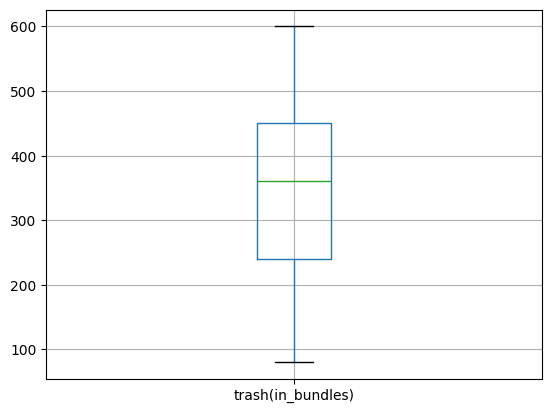

In [9]:
df.boxplot(column='trash(in_bundles)')
plt.show

In [10]:
df['trash(in_bundles)'].unique()

array([540, 600, 480, 500, 400, 450, 360, 320, 270, 300, 240, 160, 180,
       200, 100,  80,  90])

- we can observe multimodal distribution of paddy_yeild(in_kg) 

<Axes: >

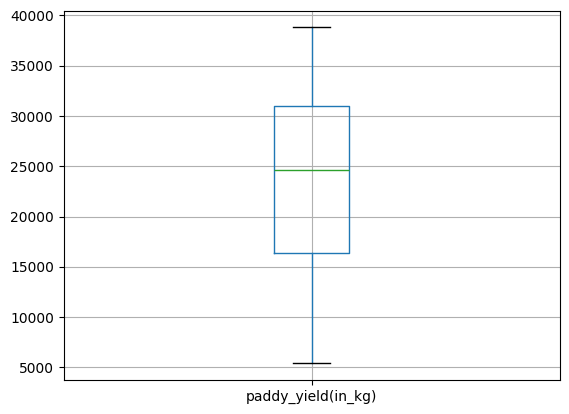

In [11]:
df.boxplot(column='paddy_yield(in_kg)')

<Axes: xlabel='paddy_yield(in_kg)', ylabel='Count'>

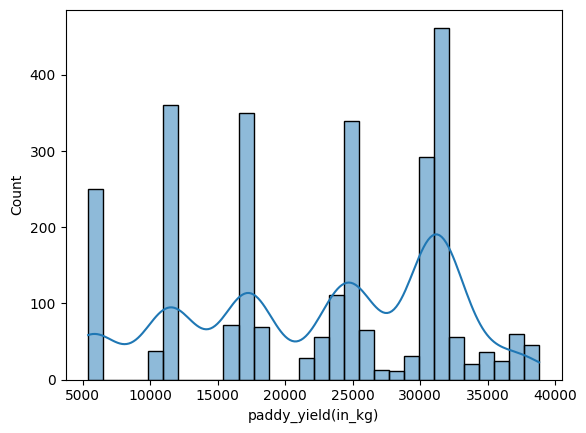

In [12]:
sns.histplot(data=df, x='paddy_yield(in_kg)', bins=30, kde=True)

In [13]:
df['hectares'].mean(),df['hectares'].median()

(np.float64(3.7174614557188956), np.float64(4.0))

<Axes: xlabel='hectares', ylabel='Count'>

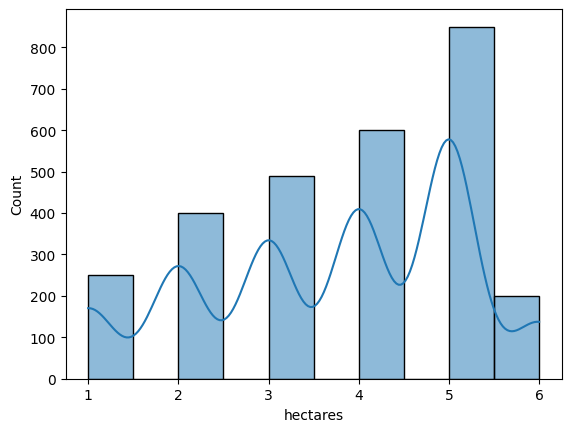

In [14]:
sns.histplot(data=df, x='hectares', bins=10, kde=True)

In [15]:
df['seedrate(in_kg)'].mean(),df['seedrate(in_kg)'].median()

(np.float64(92.93653639297239), np.float64(100.0))

<Axes: xlabel='seedrate(in_kg)', ylabel='Count'>

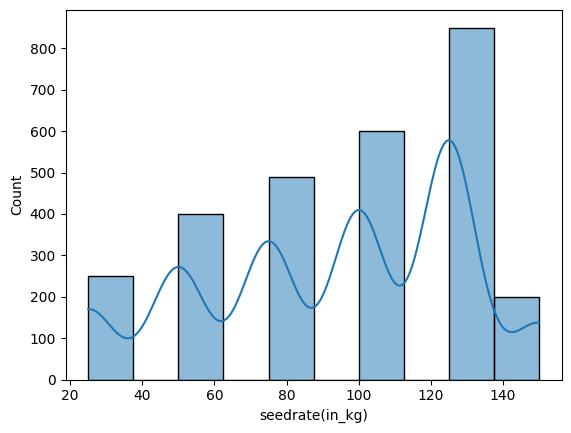

In [16]:
sns.histplot(df['seedrate(in_kg)'], bins=10, kde=True)

<Axes: xlabel='lp_mainfield(in_tonnes)', ylabel='Count'>

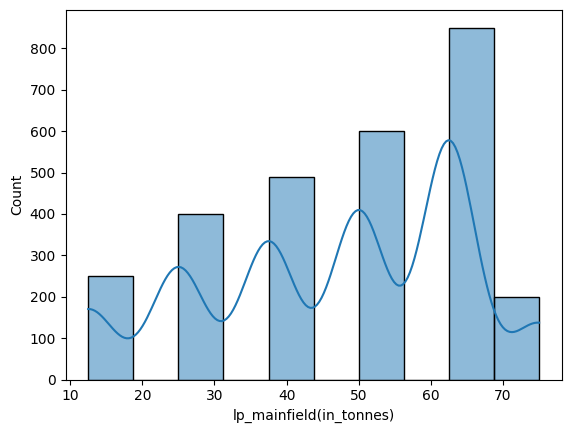

In [17]:
sns.histplot(df['lp_mainfield(in_tonnes)'], bins=10, kde=True)

<Axes: xlabel='nursery_area_(cents)', ylabel='Count'>

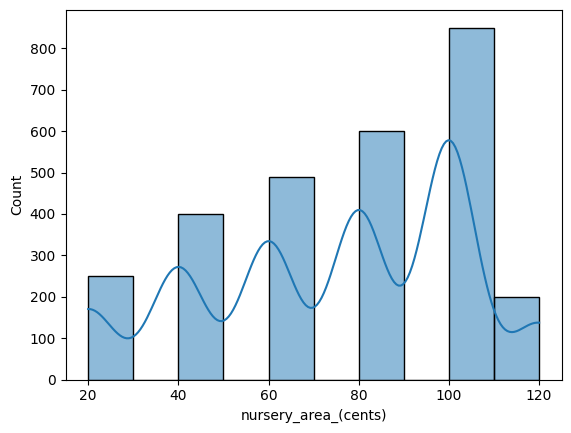

In [18]:

sns.histplot(df['nursery_area_(cents)'], bins=10, kde=True)

<Axes: xlabel='lp_nurseryarea(in_tonnes)', ylabel='Count'>

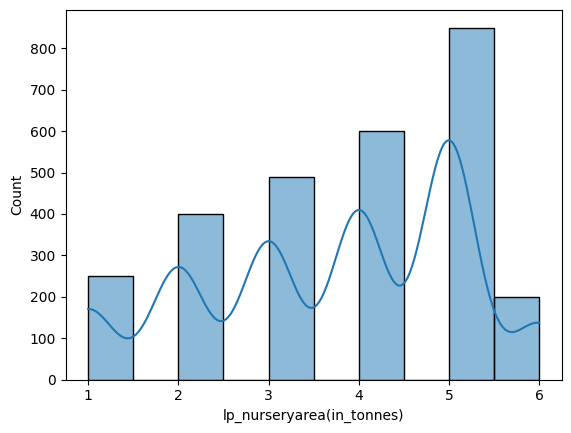

In [19]:
sns.histplot(df['lp_nurseryarea(in_tonnes)'], bins=10, kde=True)

In [20]:
columns_to_scale_rs =[]

<Axes: xlabel='dap_20days', ylabel='Count'>

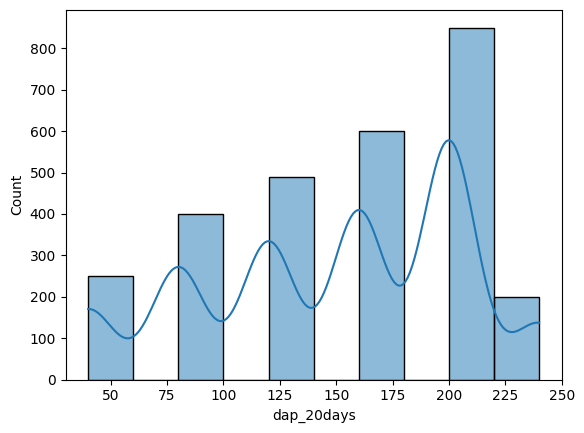

In [21]:
sns.histplot(df['dap_20days'], bins=10, kde=True)

<Axes: xlabel='weed28d_thiobencarb', ylabel='Count'>

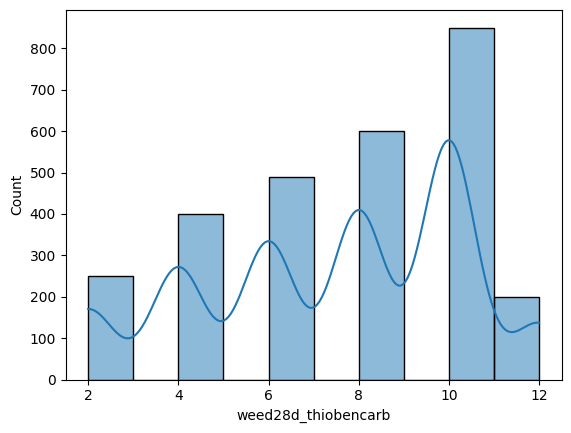

In [22]:
columns_to_scale_rs.append('dap_20days')
sns.histplot(df['weed28d_thiobencarb'], bins=10, kde=True)

<Axes: xlabel='urea_40days', ylabel='Count'>

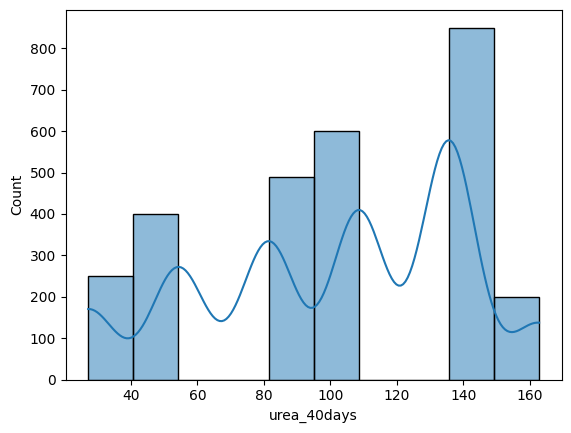

In [23]:
columns_to_scale_rs.append('weed28d_thiobencarb')
sns.histplot(df['urea_40days'], bins=10, kde=True)

<Axes: xlabel='potassh_50days', ylabel='Count'>

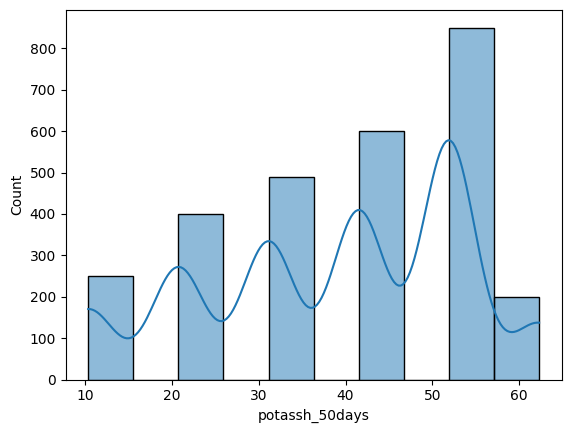

In [24]:
columns_to_scale_rs.append('urea_40days')
sns.histplot(df['potassh_50days'], bins=10, kde=True)

<Axes: xlabel='micronutrients_70days', ylabel='Count'>

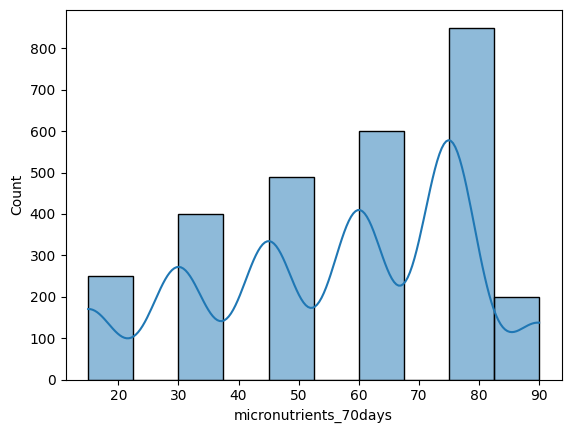

In [25]:
columns_to_scale_rs.append('potassh_50days')
sns.histplot(df['micronutrients_70days'], bins=10, kde=True)

<Axes: xlabel='pest_60day(in_ml)', ylabel='Count'>

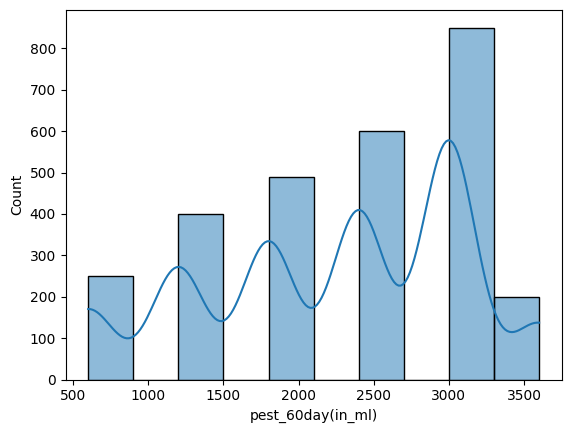

In [26]:
columns_to_scale_rs.append('micronutrients_70days')
sns.histplot(df['pest_60day(in_ml)'], bins=10, kde=True)

<Axes: xlabel='30drain(_in_mm)', ylabel='Count'>

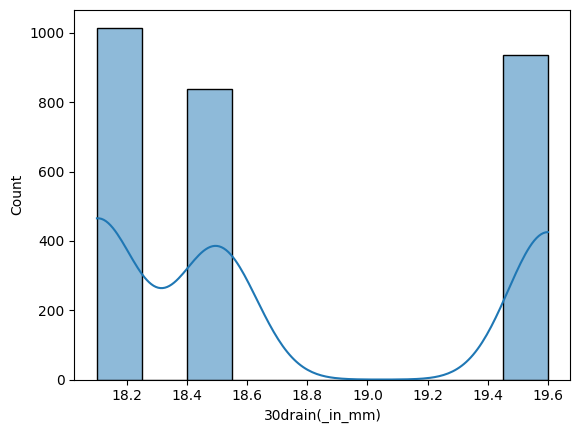

In [27]:
columns_to_scale_rs.append('pest_60day(in_ml)')
sns.histplot(df['30drain(_in_mm)'], bins=10, kde=True)

<Axes: xlabel='30dai(in_mm)', ylabel='Count'>

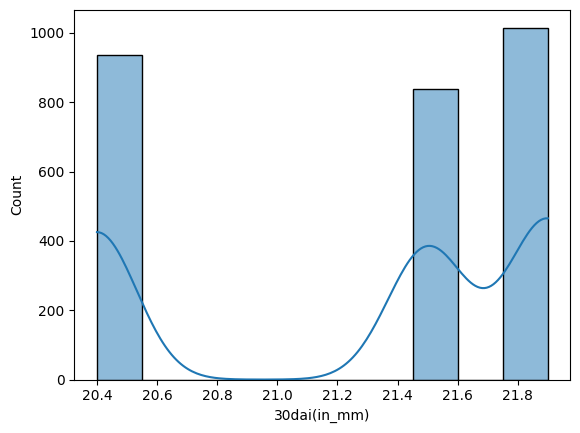

In [28]:
columns_to_scale_rs.append('30drain(_in_mm)')
sns.histplot(df['30dai(in_mm)'], bins=10, kde=True)

<Axes: xlabel='51_70drain(in_mm)', ylabel='Count'>

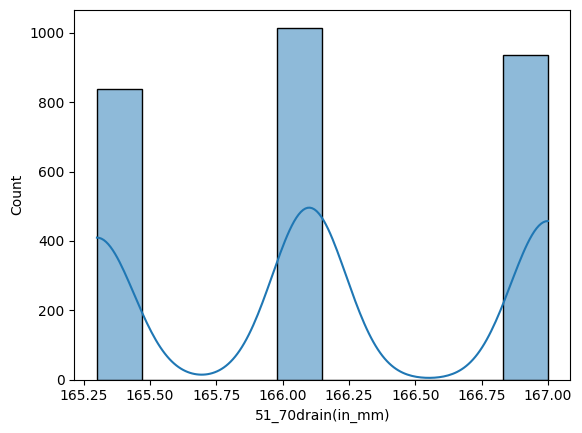

In [29]:
columns_to_scale_rs.append('30dai(in_mm)')
sns.histplot(df['51_70drain(in_mm)'], bins=10, kde=True)

<Axes: xlabel='51_70ai(in_mm)', ylabel='Count'>

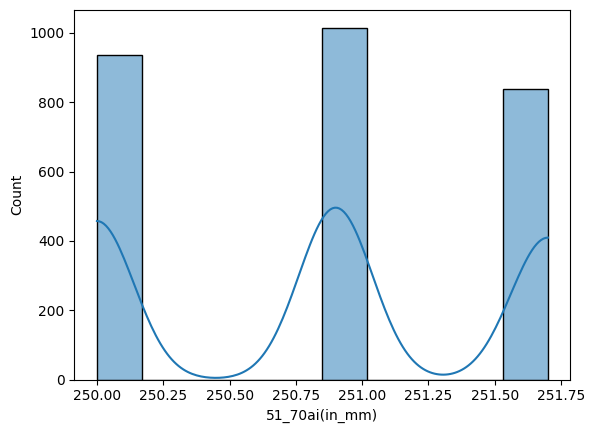

In [30]:
columns_to_scale_rs.append('51_70drain(in_mm)')
sns.histplot(df['51_70ai(in_mm)'], bins=10, kde=True)

In [31]:
numerical_cols

['hectares',
 'seedrate(in_kg)',
 'lp_mainfield(in_tonnes)',
 'nursery_area_(cents)',
 'lp_nurseryarea(in_tonnes)',
 'dap_20days',
 'weed28d_thiobencarb',
 'urea_40days',
 'potassh_50days',
 'micronutrients_70days',
 'pest_60day(in_ml)',
 '30drain(_in_mm)',
 '30dai(in_mm)',
 '30_50drain(_in_mm)',
 '30_50dai(in_mm)',
 '51_70drain(in_mm)',
 '51_70ai(in_mm)',
 '71_105drain(in_mm)',
 '71_105dai(in_mm)',
 'min_temp_d1_d30',
 'max_temp_d1_d30',
 'min_temp_d31_d60',
 'max_temp_d31_d60',
 'min_temp_d61_d90',
 'max_temp_d61_d90',
 'min_temp_d91_d120',
 'max_temp_d91_d120',
 'inst_wind_speed_d1_d30(in_knots)',
 'inst_wind_speed_d31_d60(in_knots)',
 'inst_wind_speed_d61_d90(in_knots)',
 'inst_wind_speed_d91_d120(in_knots)',
 'relative_humidity_d1_d30',
 'relative_humidity_d31_d60',
 'relative_humidity_d61_d90',
 'relative_humidity_d91_d120',
 'trash(in_bundles)',
 'paddy_yield(in_kg)']

# Normalization

### paddy yield

- The distribution was multimodal and has many outliers at 5400. Which is very far away from the next cluster.
- For such distribution and presence of large number of outliers require robust scaling that works well for many outliers.
- RobustScaler uses median and Inter quartile range for scaling

In [32]:
rs = RobustScaler()
df['paddy_yield(in_kg)_scaled'] = rs.fit_transform(df[['paddy_yield(in_kg)']])

<Axes: xlabel='paddy_yield(in_kg)_scaled', ylabel='Count'>

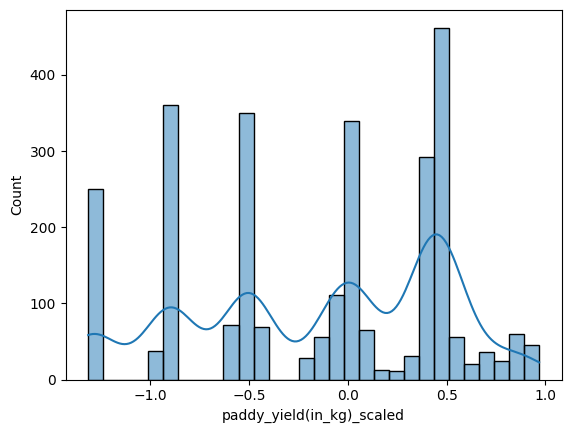

In [33]:
sns.histplot(df['paddy_yield(in_kg)_scaled'], bins=30, kde=True)

In [34]:
rs = RobustScaler()
df['seedrate(in_kg)_scaled'] = rs.fit_transform(df[['seedrate(in_kg)']])

<Axes: xlabel='seedrate(in_kg)_scaled', ylabel='Count'>

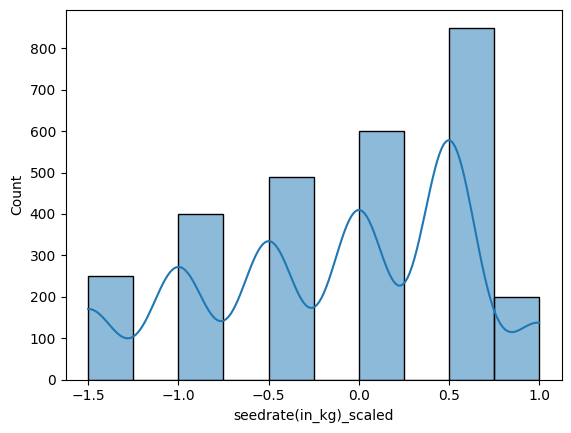

In [35]:
sns.histplot(df['seedrate(in_kg)_scaled'], bins=10, kde=True)

In [36]:
rs = RobustScaler()
df['hectares_scaled'] = rs.fit_transform(df[['hectares']])

<Axes: xlabel='hectares_scaled', ylabel='Count'>

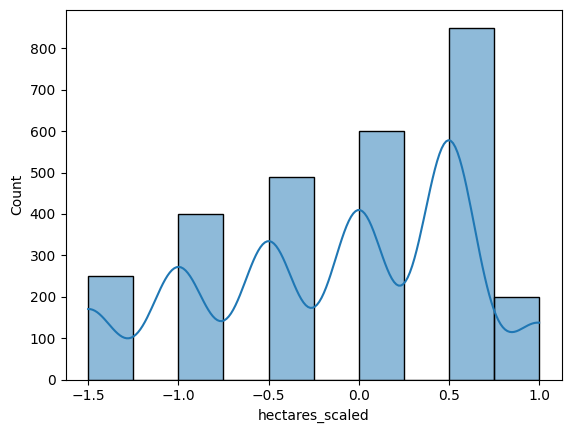

In [37]:
sns.histplot(df['hectares_scaled'], bins=10, kde=True)

In [38]:
rs = RobustScaler()
df['lp_mainfield(in_tonnes)_scaled'] = rs.fit_transform(df[['lp_mainfield(in_tonnes)']])

<Axes: xlabel='lp_mainfield(in_tonnes)_scaled', ylabel='Count'>

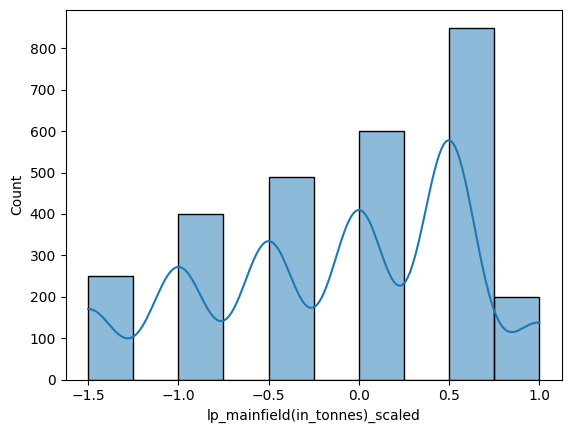

In [39]:
sns.histplot(df['lp_mainfield(in_tonnes)_scaled'], bins=10, kde=True)

In [40]:
rs = RobustScaler()
df['nursery_area_(cents)_scaled'] = rs.fit_transform(df[['nursery_area_(cents)']])

In [41]:
rs = RobustScaler()
df['lp_nurseryarea(in_tonnes)_scaled'] = rs.fit_transform(df[['lp_nurseryarea(in_tonnes)']])

In [42]:
for col in numerical_cols[5:-1]:
    rs = RobustScaler()
    df[f'{col}_scaled'] = rs.fit_transform(df[[col]])

In [43]:
df = df.drop(columns = numerical_cols)

In [44]:
df.describe()

,paddy_yield(in_kg)_scaled,seedrate(in_kg)_scaled,hectares_scaled,lp_mainfield(in_tonnes)_scaled,nursery_area_(cents)_scaled,lp_nurseryarea(in_tonnes)_scaled,dap_20days_scaled,weed28d_thiobencarb_scaled,urea_40days_scaled,potassh_50days_scaled,...,max_temp_d91_d120_scaled,inst_wind_speed_d1_d30(in_knots)_scaled,inst_wind_speed_d31_d60(in_knots)_scaled,inst_wind_speed_d61_d90(in_knots)_scaled,inst_wind_speed_d91_d120(in_knots)_scaled,relative_humidity_d1_d30_scaled,relative_humidity_d31_d60_scaled,relative_humidity_d61_d90_scaled,relative_humidity_d91_d120_scaled,trash(in_bundles)_scaled
count,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,...,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000
mean,-0.144631,-0.141269,-0.141269,-0.141269,-0.141269,-0.141269,-0.141269,-0.141269,-0.141269,-0.141269,...,-0.197562,-0.127764,-0.247879,0.086411,-0.091789,0.273611,-0.227059,0.232054,-0.023425,-0.116615
std,0.628135,0.718888,0.718888,0.718888,0.718888,0.718888,0.718888,0.718888,0.718888,0.718888,...,0.997232,0.427758,0.533946,0.996798,0.419444,0.615489,0.451782,0.698506,0.522479,0.639594
min,-1.312713,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000,...,-1.666667,-0.666667,-1.000000,-2.000000,-0.666667,-0.623077,-0.866667,-0.600000,-0.833333,-1.333333
25%,-0.563089,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,...,-1.000000,-0.666667,-0.666667,0.000000,-0.666667,-0.053846,-0.733333,-0.200000,-0.500000,-0.571429
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.436911,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.000000,0.333333,0.333333,1.000000,0.333333,0.946154,0.266667,0.800000,0.500000,0.428571
max,0.968046,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.333333,0.333333,0.333333,1.000000,0.333333,1.215385,0.333333,1.600000,0.666667,1.142857


# Feature selection

In [45]:
numerical_cols = [col+'_scaled' for col in numerical_cols]

In [46]:
corr_with_target = df[numerical_cols].corr()['paddy_yield(in_kg)_scaled'].abs().sort_values(ascending=False)

In [47]:
columns_high_corr = corr_with_target[corr_with_target>0.94].index.to_list()
columns_high_corr

['paddy_yield(in_kg)_scaled',
 'urea_40days_scaled',
 'lp_mainfield(in_tonnes)_scaled',
 'seedrate(in_kg)_scaled',
 'hectares_scaled',
 'lp_nurseryarea(in_tonnes)_scaled',
 'nursery_area_(cents)_scaled',
 'weed28d_thiobencarb_scaled',
 'dap_20days_scaled',
 'micronutrients_70days_scaled',
 'pest_60day(in_ml)_scaled',
 'potassh_50days_scaled',
 'trash(in_bundles)_scaled']

In [48]:
df.drop(columns = columns_high_corr[1:],inplace=True)

In [55]:
numerical_cols = df.dtypes[df.dtypes!='object'].index.to_list()
df[numerical_cols].corr()['paddy_yield(in_kg)_scaled'].abs().sort_values(ascending=False)

paddy_yield(in_kg)_scaled                    1.000000
inst_wind_speed_d1_d30(in_knots)_scaled      0.020194
min_temp_d1_d30_scaled                       0.019400
inst_wind_speed_d61_d90(in_knots)_scaled     0.018535
max_temp_d61_d90_scaled                      0.018243
min_temp_d61_d90_scaled                      0.018043
relative_humidity_d1_d30_scaled              0.016463
max_temp_d91_d120_scaled                     0.014540
max_temp_d31_d60_scaled                      0.011483
min_temp_d31_d60_scaled                      0.010300
max_temp_d1_d30_scaled                       0.010018
inst_wind_speed_d91_d120(in_knots)_scaled    0.009762
inst_wind_speed_d31_d60(in_knots)_scaled     0.009250
51_70drain(in_mm)_scaled                     0.007629
51_70ai(in_mm)_scaled                        0.007629
relative_humidity_d61_d90_scaled             0.007278
relative_humidity_d91_d120_scaled            0.006871
30dai(in_mm)_scaled                          0.006570
30drain(_in_mm)_scaled      

In [92]:
corr_df = df[numerical_cols].corr()
corr_df

,paddy_yield(in_kg)_scaled,30drain(_in_mm)_scaled,30dai(in_mm)_scaled,30_50drain(_in_mm)_scaled,30_50dai(in_mm)_scaled,51_70drain(in_mm)_scaled,51_70ai(in_mm)_scaled,71_105drain(in_mm)_scaled,71_105dai(in_mm)_scaled,min_temp_d1_d30_scaled,...,min_temp_d91_d120_scaled,max_temp_d91_d120_scaled,inst_wind_speed_d1_d30(in_knots)_scaled,inst_wind_speed_d31_d60(in_knots)_scaled,inst_wind_speed_d61_d90(in_knots)_scaled,inst_wind_speed_d91_d120(in_knots)_scaled,relative_humidity_d1_d30_scaled,relative_humidity_d31_d60_scaled,relative_humidity_d61_d90_scaled,relative_humidity_d91_d120_scaled
paddy_yield(in_kg)_scaled,1.000000,-0.006570,0.006570,0.001892,-0.001892,0.007629,-0.007629,0.001892,-0.001892,0.019400,...,0.003626,0.014540,0.020194,0.009250,0.018535,0.009762,-0.016463,0.002143,-0.007278,-0.006871
30drain(_in_mm)_scaled,-0.006570,1.000000,-1.000000,0.902402,-0.902402,0.729207,-0.729207,0.902402,-0.902402,-0.249256,...,-0.047537,-0.517603,-0.127806,-0.366618,0.133424,-0.504516,-0.547468,-0.469825,0.029744,0.401022
30dai(in_mm)_scaled,0.006570,-1.000000,1.000000,-0.902402,0.902402,-0.729207,0.729207,-0.902402,0.902402,0.249256,...,0.047537,0.517603,0.127806,0.366618,-0.133424,0.504516,0.547468,0.469825,-0.029744,-0.401022
30_50drain(_in_mm)_scaled,0.001892,0.902402,-0.902402,1.000000,-1.000000,0.952896,-0.952896,1.000000,-1.000000,-0.256441,...,-0.223529,-0.424623,0.040179,-0.341911,0.427273,-0.357620,-0.818371,-0.715345,0.243006,0.543114
30_50dai(in_mm)_scaled,-0.001892,-0.902402,0.902402,-1.000000,1.000000,-0.952896,0.952896,-1.000000,1.000000,0.256441,...,0.223529,0.424623,-0.040179,0.341911,-0.427273,0.357620,0.818371,0.715345,-0.243006,-0.543114
51_70drain(in_mm)_scaled,0.007629,0.729207,-0.729207,0.952896,-0.952896,1.000000,-1.000000,0.952896,-0.952896,-0.231802,...,-0.321520,-0.310004,0.153766,-0.284927,0.584627,-0.212811,-0.914286,-0.805323,0.364976,0.580236
51_70ai(in_mm)_scaled,-0.007629,-0.729207,0.729207,-0.952896,0.952896,-1.000000,1.000000,-0.952896,0.952896,0.231802,...,0.321520,0.310004,-0.153766,0.284927,-0.584627,0.212811,0.914286,0.805323,-0.364976,-0.580236
71_105drain(in_mm)_scaled,0.001892,0.902402,-0.902402,1.000000,-1.000000,0.952896,-0.952896,1.000000,-1.000000,-0.256441,...,-0.223529,-0.424623,0.040179,-0.341911,0.427273,-0.357620,-0.818371,-0.715345,0.243006,0.543114
71_105dai(in_mm)_scaled,-0.001892,-0.902402,0.902402,-1.000000,1.000000,-0.952896,0.952896,-1.000000,1.000000,0.256441,...,0.223529,0.424623,-0.040179,0.341911,-0.427273,0.357620,0.818371,0.715345,-0.243006,-0.543114
min_temp_d1_d30_scaled,0.019400,-0.249256,0.249256,-0.256441,0.256441,-0.231802,0.231802,-0.256441,0.256441,1.000000,...,0.701270,0.578730,0.488314,0.546012,0.090612,0.361952,-0.120880,0.687310,-0.728876,-0.769001


In [93]:
corr_df[(corr_df > 0.92) & (corr_df < 1.0)].count()

paddy_yield(in_kg)_scaled                    0
30drain(_in_mm)_scaled                       0
30dai(in_mm)_scaled                          0
30_50drain(_in_mm)_scaled                    1
30_50dai(in_mm)_scaled                       1
51_70drain(in_mm)_scaled                     2
51_70ai(in_mm)_scaled                        2
71_105drain(in_mm)_scaled                    1
71_105dai(in_mm)_scaled                      1
min_temp_d1_d30_scaled                       1
max_temp_d1_d30_scaled                       0
min_temp_d31_d60_scaled                      0
max_temp_d31_d60_scaled                      0
min_temp_d61_d90_scaled                      1
max_temp_d61_d90_scaled                      0
min_temp_d91_d120_scaled                     0
max_temp_d91_d120_scaled                     0
inst_wind_speed_d1_d30(in_knots)_scaled      0
inst_wind_speed_d31_d60(in_knots)_scaled     0
inst_wind_speed_d61_d90(in_knots)_scaled     0
inst_wind_speed_d91_d120(in_knots)_scaled    0
relative_humi